<a href="https://colab.research.google.com/github/hmyrcmn/MachinaLearning/blob/main/Tahmin_Algoritmalar%C4%B1n%C4%B1n_De%C4%9Ferlendirilmesi_(Evaluation_of_Predictions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


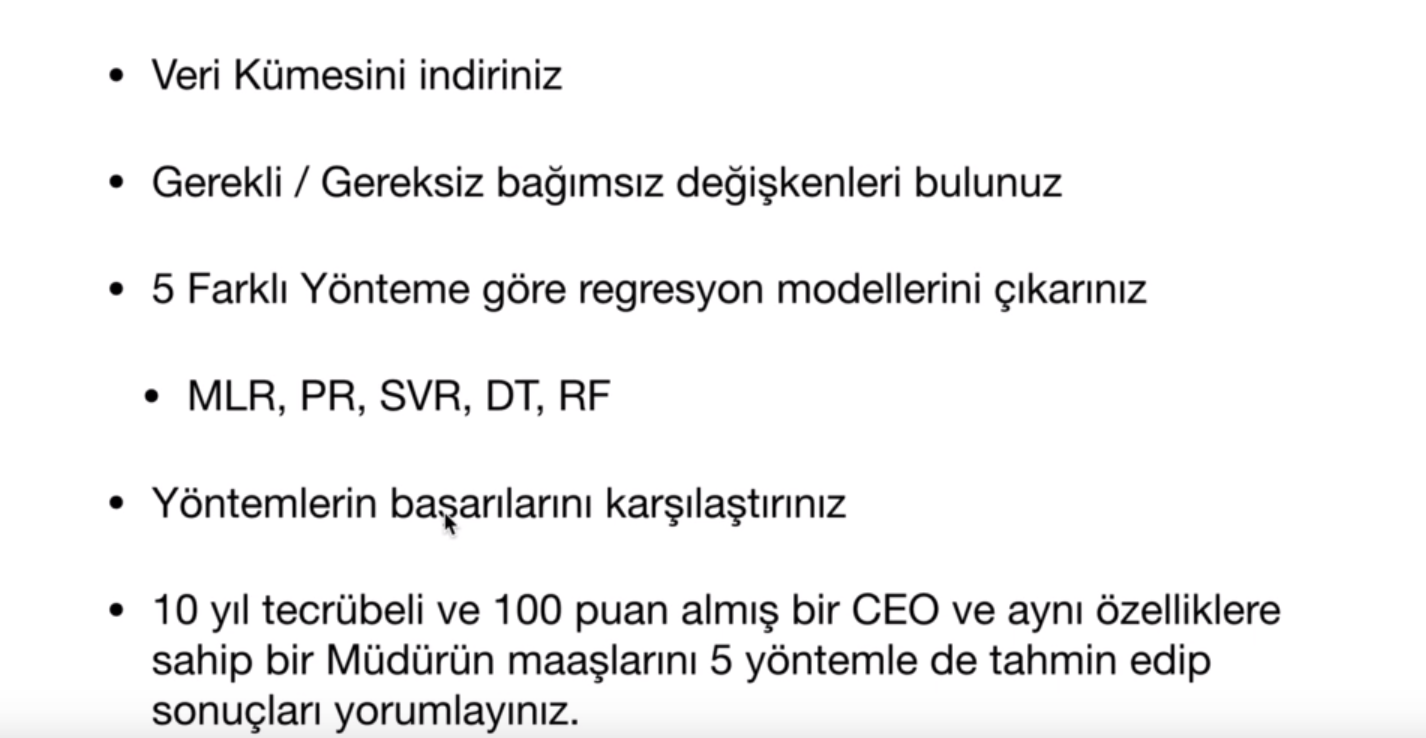
---



In [299]:
import pandas as pd
data=pd.read_csv('/content/data.csv')
data

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
0,1,Cayci,1,5,70,2250
1,2,Sekreter,2,5,70,2500
2,3,Uzman Yardimcisi,3,5,70,3000
3,4,Uzman,4,5,70,4000
4,5,Proje Yoneticisi,5,5,70,5500
5,6,Sef,6,5,70,7500
6,7,Mudur,7,5,70,10000
7,8,Direktor,8,5,70,15000
8,9,C-level,9,5,70,25000
9,10,CEO,10,5,70,50000


In [300]:

data.shape
#verinin boyutunun öğrenilmesi
# metadata (veriye ait veri )

(30, 6)

In [301]:
#veride null degerler varmı nasıl kodntrol edili
cauntNull=data.isnull().sum()
print(cauntNull)



Calisan ID       0
unvan            0
UnvanSeviyesi    0
Kidem            0
Puan             0
maas             0
dtype: int64


In [302]:
x=data.iloc[:,2:5]
x


,UnvanSeviyesi,Kidem,Puan
0,1,5,70
1,2,5,70
2,3,5,70
3,4,5,70
4,5,5,70
5,6,5,70
6,7,5,70
7,8,5,70
8,9,5,70
9,10,5,70


In [303]:
y=data.iloc[:,5:]
y

,maas
0,2250
1,2500
2,3000
3,4000
4,5500
5,7500
6,10000
7,15000
8,25000
9,50000


seçilen özelliklere ne kadar doğru seçilfi test içn p value kullanılacak lineer regresyon ile


In [304]:
X= x.values
X

array([[ 1,  5, 70],
       [ 2,  5, 70],
       [ 3,  5, 70],
       [ 4,  5, 70],
       [ 5,  5, 70],
       [ 6,  5, 70],
       [ 7,  5, 70],
       [ 8,  5, 70],
       [ 9,  5, 70],
       [10,  5, 70],
       [ 1,  7, 99],
       [ 2,  7,  9],
       [ 3,  7, 62],
       [ 4,  4, 38],
       [ 5,  1, 80],
       [ 6,  2, 35],
       [ 7,  8, 99],
       [ 8,  4, 58],
       [ 9,  2, 20],
       [10,  4, 42],
       [ 1,  8, 11],
       [ 2,  2, 53],
       [ 3,  8, 50],
       [ 4,  9, 91],
       [ 5,  9, 71],
       [ 6,  1,  2],
       [ 7, 10, 81],
       [ 8, 10, 38],
       [ 9,  1, 50],
       [10,  9, 83]])

In [305]:
Y=y.values
Y

array([[ 2250],
       [ 2500],
       [ 3000],
       [ 4000],
       [ 5500],
       [ 7500],
       [10000],
       [15000],
       [25000],
       [50000],
       [ 2000],
       [ 2500],
       [ 4000],
       [ 3000],
       [ 5000],
       [ 5000],
       [12000],
       [11000],
       [15000],
       [22000],
       [ 2200],
       [ 2200],
       [ 2800],
       [ 6000],
       [ 5400],
       [ 4000],
       [12000],
       [10000],
       [15000],
       [60000]])

In [306]:
# linear regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

linear_reg= LinearRegression()

#linear_reg.fit(X,Y)
linear_reg.fit(x,y)

import statsmodels.api as sm
model=sm.OLS(linear_reg.predict(x),x)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              83.89
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                    8.38e-14
Time:                        07:36:18   Log-Likelihood:                         -295.74
No. Observations:                  30   AIC:                                      597.5
Df Residuals:                      27   BIC:                                      601.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2494.8107    256.145      9.740      0.000    1969.244    3020.377
Kidem             1.3531    318.990      0.004      0.997    -653.161     655.867
Puan            -26.5687     33.657     -0.789      0.437     -95.626      42.489
==============================================================================
Omnibus:                        0.440   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.573
Skew:                           0.109   Prob(JB):                        0.751
Kurtosis:                       2.359   Cond. No.                         23.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
# p value deki top degerl olan kıdem ve puan  0.9 eliminize edilirse
x=data.iloc[:,2:3]
x
linear_reg.fit(x,y)
import statsmodels.api as sm
model=sm.OLS(linear_reg.predict(x),x)
model.fit().summary()
# kıdem ve puan değerleri sistemi olumsuz etkiliyormuş r2 score: 0.903 den --- 0.942 ye yükseldi p value: 0



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              468.1
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                    1.93e-19
Time:                        07:36:19   Log-Likelihood:                         -287.43
No. Observations:                  30   AIC:                                      576.9
Df Residuals:                      29   BIC:                                      578.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2269.9134    104.919     21.635      0.000    2055.330    2484.497
==============================================================================
Omnibus:                        5.870   Durbin-Watson:                   0.600
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                1.873
Skew:                          -0.000   Prob(JB):                        0.392
Kurtosis:                       1.776   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
# polynomial regression :
from sklearn.preprocessing import PolynomialFeatures
# herhangi bir sayıyı poinomal aolarak ifade etmeyi sağlar 4
poly_reg=PolynomialFeatures(degree=4) # ikinci derecen bir polinam freatures object created
x_poly= poly_reg.fit_transform(x)
x_poly

lin_reg2= LinearRegression()
lin_reg2.fit(x_poly,y)

#plt.scatter(x,y,color="red")
#plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x)),color="blue")

LinearRegression()

POLY OLS

In [309]:
import statsmodels.api as sm
model2=sm.OLS(lin_reg2.predict(poly_reg.fit_transform(x)),x )
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                              91.39
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                    1.82e-10
Time:                        07:36:19   Log-Likelihood:                         -311.94
No. Observations:                  30   AIC:                                      625.9
Df Residuals:                      29   BIC:                                      627.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2269.9134    237.448      9.560      0.000    1784.278    2755.548
==============================================================================
Omnibus:                       23.972   Durbin-Watson:                   1.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.342
Skew:                           2.067   Prob(JB):                     3.49e-08
Kurtosis:                       6.223   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
#veriler ölçeklendirildi
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_olcekli=sc1.fit_transform(x)

sc2=StandardScaler()
y_olcekli=sc2.fit_transform(y)


SVR

In [311]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

svr_reg = SVR(kernel='rbf')

svr_reg.fit(x_olcekli,y_olcekli)
#iki değer arasındaki ilşkiyi bulması

#svr ols
import statsmodels.api as sm
model3=sm.OLS(svr_reg.predict(x_olcekli),y_olcekli)
model3.fit().summary()




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.668
Model:                            OLS   Adj. R-squared (uncentered):              0.656
Method:                 Least Squares   F-statistic:                              58.24
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                    2.05e-08
Time:                        07:36:19   Log-Likelihood:                         -6.9054
No. Observations:                  30   AIC:                                      15.81
Df Residuals:                      29   BIC:                                      17.21
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4316      0.057      7.631      0.000       0.316       0.547
==============================================================================
Omnibus:                        8.549   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                7.045
Skew:                           1.125   Prob(JB):                       0.0295
Kurtosis:                       3.759   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
print("SVR  rbf R2 SCORE")
from sklearn.metrics import r2_score

r2_score(y_olcekli,svr_reg.predict(x_olcekli))

SVR  rbf R2 SCORE


0.5841869084594333

In [313]:
# POLY R2 SCORE
print("POLY R2 SCORE")
r2_score(y,lin_reg2.predict(poly_reg.fit_transform(x)))


POLY R2 SCORE


0.8174873280442536

DECISION TREE


In [314]:
from sklearn.tree import DecisionTreeRegressor
r_dt =DecisionTreeRegressor(random_state=0) # default constuncter parameter
r_dt.fit(x,y)

z=x+0.5
k=x-0.5

# decision tree ols

model4= sm.OLS(r_dt.predict(x),x)
model4.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              87.29
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                    3.01e-10
Time:                        07:36:19   Log-Likelihood:                         -312.62
No. Observations:                  30   AIC:                                      627.2
Df Residuals:                      29   BIC:                                      628.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2269.9134    242.950      9.343      0.000    1773.025    2766.802
==============================================================================
Omnibus:                       27.769   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.942
Skew:                           2.292   Prob(JB):                     1.06e-10
Kurtosis:                       6.968   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [315]:
#RANDOM FOREST OLS

from sklearn.ensemble  import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=10,random_state=0) # n_estimators kac tane decison trree çizileceiğini belitriyor


y_numpy = y.to_numpy()
x_numpy = x.to_numpy()

rf_reg.fit(x_numpy,y_numpy.ravel()) # matirs convert to array


print( "random forest ols : ")

model5= sm.OLS(rf_reg.predict(x),x)
model5.fit().summary()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


random forest ols : 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              74.13
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                    1.75e-09
Time:                        07:36:19   Log-Likelihood:                         -315.35
No. Observations:                  30   AIC:                                      632.7
Df Residuals:                      29   BIC:                                      634.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2290.6820    266.050      8.610      0.000    1746.548    2834.816
==============================================================================
Omnibus:                       28.961   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.982
Skew:                           2.369   Prob(JB):                     1.40e-11
Kurtosis:                       7.189   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sonuçların analizi :

tek parametreli veri setine ait analizeler:

linear:
R-squared (uncentered):	0.942


poly : R-squared (uncentered):	0.759


svr rbf :R-squared (uncentered):	0.668

decision tree : R-squared (uncentered):	0.751

random forset :R-squared (uncentered):	0.719

**çok değişkenli **


linear : R-squared (uncentered):	0.903

poly :R-squared (uncentered):	0.680

svr: R-squared (uncentered):	0.731

decision tree :R-squared (uncentered):	0.679

random forest :R-squared (uncentered):	0.713







çok değişken ile r square analize.

In [316]:
x=data.iloc[:,2:5]
x
y=data.iloc[:,5:]
y
X= x.values
X
Y=y.values
Y
# linear regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm


linear_reg= LinearRegression()

#linear_reg.fit(X,Y)
linear_reg.fit(x,y)

import statsmodels.api as sm
model=sm.OLS(linear_reg.predict(x),x)
model.fit().summary()







<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              83.89
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                    8.38e-14
Time:                        07:36:19   Log-Likelihood:                         -295.74
No. Observations:                  30   AIC:                                      597.5
Df Residuals:                      27   BIC:                                      601.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2494.8107    256.145      9.740      0.000    1969.244    3020.377
Kidem             1.3531    318.990      0.004      0.997    -653.161     655.867
Puan            -26.5687     33.657     -0.789      0.437     -95.626      42.489
==============================================================================
Omnibus:                        0.440   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.573
Skew:                           0.109   Prob(JB):                        0.751
Kurtosis:                       2.359   Cond. No.                         23.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
# polynomial regression :
from sklearn.preprocessing import PolynomialFeatures
# herhangi bir sayıyı poinomal aolarak ifade etmeyi sağlar 4
poly_reg=PolynomialFeatures(degree=4) # ikinci derecen bir polinam freatures object created
x_poly= poly_reg.fit_transform(x)
x_poly

lin_reg2= LinearRegression()
lin_reg2.fit(x_poly,y)
model2=sm.OLS(lin_reg2.predict(poly_reg.fit_transform(x)),x )
model2.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              19.11
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                    7.49e-07
Time:                        07:36:19   Log-Likelihood:                         -317.93
No. Observations:                  30   AIC:                                      641.9
Df Residuals:                      27   BIC:                                      646.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2494.8107    536.645      4.649      0.000    1393.705    3595.916
Kidem             1.3531    668.311      0.002      0.998   -1369.907    1372.614
Puan            -26.5687     70.513     -0.377      0.709    -171.250     118.113
==============================================================================
Omnibus:                       39.861   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.882
Skew:                           2.862   Prob(JB):                     3.42e-27
Kurtosis:                      11.046   Cond. No.                         23.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
#veriler ölçeklendirildi
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_olcekli=sc1.fit_transform(x)

sc2=StandardScaler()
y_olcekli=sc2.fit_transform(y)

In [319]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

svr_reg = SVR(kernel='rbf')

svr_reg.fit(x_olcekli,y_olcekli)
#iki değer arasındaki ilşkiyi bulması
#svr ols
import statsmodels.api as sm
model3=sm.OLS(svr_reg.predict(x_olcekli),y_olcekli)
model3.fit().summary()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.722
Method:                 Least Squares   F-statistic:                              78.87
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                    9.07e-10
Time:                        07:36:19   Log-Likelihood:                         -4.0992
No. Observations:                  30   AIC:                                      10.20
Df Residuals:                      29   BIC:                                      11.60
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4575      0.052      8.881      0.000       0.352       0.563
==============================================================================
Omnibus:                        0.922   Durbin-Watson:                   0.776
Prob(Omnibus):                  0.631   Jarque-Bera (JB):                0.947
Skew:                           0.341   Prob(JB):                        0.623
Kurtosis:                       2.459   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [320]:


from sklearn.tree import DecisionTreeRegressor
r_dt =DecisionTreeRegressor(random_state=0) # default constuncter parameter
r_dt.fit(x,y)

z=x+0.5
k=x-0.5

# decision tree ols

model4= sm.OLS(r_dt.predict(x),x)
model4.fit().summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              19.08
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                    7.62e-07
Time:                        07:36:19   Log-Likelihood:                         -317.95
No. Observations:                  30   AIC:                                      641.9
Df Residuals:                      27   BIC:                                      646.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2494.8107    537.146      4.645      0.000    1392.677    3596.944
Kidem             1.3531    668.935      0.002      0.998   -1371.187    1373.894
Puan            -26.5687     70.579     -0.376      0.710    -171.385     118.248
==============================================================================
Omnibus:                       40.370   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.722
Skew:                           2.897   Prob(JB):                     5.01e-28
Kurtosis:                      11.186   Cond. No.                         23.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:

#RANDOM FOREST OLS

from sklearn.ensemble  import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=10,random_state=0) # n_estimators kac tane decison trree çizileceiğini belitriyor


y_numpy = y.to_numpy()
x_numpy = x.to_numpy()

rf_reg.fit(x_numpy,y_numpy.ravel()) # matirs convert to array


print( "random forest ols : ")

model5= sm.OLS(rf_reg.predict(x),x)
model5.fit().summary()



random forest ols : 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.713
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                              22.31
Date:                Fri, 13 Oct 2023   Prob (F-statistic):                    1.79e-07
Time:                        07:36:19   Log-Likelihood:                         -316.07
No. Observations:                  30   AIC:                                      638.1
Df Residuals:                      27   BIC:                                      642.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
UnvanSeviyesi  2671.9265    504.444      5.297      0.000    1636.892    3706.961
Kidem             1.0522    628.209      0.002      0.999   -1287.927    1290.031
Puan            -44.2927     66.282     -0.668      0.510    -180.293      91.707
==============================================================================
Omnibus:                       32.588   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.156
Skew:                           2.425   Prob(JB):                     1.30e-16
Kurtosis:                       8.916   Cond. No.                         23.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**çok değişkenli **


linear : R-squared (uncentered):	0.903

poly :R-squared (uncentered):	0.680

svr: R-squared (uncentered):	0.731

decision tree :R-squared (uncentered):	0.679

random forest :R-squared (uncentered):	0.713

sonuçların analizi :

tek parametreli veri setine ait analizeler:

linear:
R-squared (uncentered):	0.942


poly : R-squared (uncentered):	0.759


svr rbf :R-squared (uncentered):	0.668

decision tree : R-squared (uncentered):	0.751

random forset :R-squared (uncentered):	0.719

**çok değişkenli **


linear : R-squared (uncentered):	0.903

poly :R-squared (uncentered):	0.680

svr: R-squared (uncentered):	0.731

decision tree :R-squared (uncentered):	0.679

random forest :R-squared (uncentered):	0.713







In [322]:
data.corr()

<ipython-input-322-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Calisan ID,UnvanSeviyesi,Kidem,Puan,maas
Calisan ID,1.000000,0.331847,0.206278,-0.251278,0.226287
UnvanSeviyesi,0.331847,1.000000,-0.125200,0.034948,0.727036
Kidem,0.206278,-0.125200,1.000000,0.322796,0.117964
Puan,-0.251278,0.034948,0.322796,1.000000,0.201474
maas,0.226287,0.727036,0.117964,0.201474,1.000000



Model	Tek Değişkenli	Çok Değişkenli
Linear	0.942	0.903
Poly	0.759	0.680
SVR (rbf)	0.668	0.731
Decision Tree	0.751	0.679
Random Forest	0.719	0.713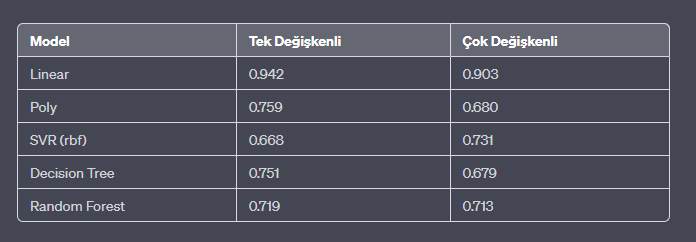